# Logistic Regrssion dan Implementasi Kedalam Python

**Logistic Regression** merupakan sebuah model Statictik untuk memprediksi *binary class* ( 0 vs 1 ). Model ini digunakan ketika variabel dependen ( target ) adalah kategoris.

Logistic Regression menentukan prediksi bobot terbaik *b0,b1,...,br* sedemikian rupa sehingga fungsi(x) sedekat mungkin dengan semua respons sebenarnya. Untuk mendapatkan bobot terbaik, biasanya kita bisa memaksimalkan fungsi **likelihood(LLF)** untuk semua pengamatan, metode ini disebut dengan **maximum likelihood estimation** dan di representasikan dengan persamaan  $LLF = Σᵢ(𝑦ᵢ log(𝑝(𝐱ᵢ)) + (1 − 𝑦ᵢ) log(1 − 𝑝(𝐱ᵢ)))$

**Contoh Penggunaan Logistic Regression**
- memprediksi apakah sebuah email termasuk kedalam spam (1) atau bukan (0)
- Apakah tumor ganas (1) atau bukan (0)

**Rumus**
- Multiple Linear Regression <br>
$y=\alpha + \beta 1X1 + ... + \beta nXn$ <br>
$g(X)=\alpha + \beta X$


- Logistic Regression<br>
$g(X) = sigmoid(\alpha + \beta X)$ <br>
$sigmoid(x) = \frac{1}{1+e^{-x}}$

![title](img/logistic_regression.jpg)

# Implementasi Logistic Regression Dengan Python

Contoh pertama terkait dengan *single-variate binary classification problem*. Ada beberapa langkah umum yang harus kita ambil saat menyiapkan model klasifikasi.

**Step 1:** Import *Packages, function and class* yang dibutuhkan

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

**Step 2:** Buat Data sample, mari kita buat array untuk input(x) dan output(y):

input dan output harus berupa array Numpy ( instance kelas numpy.ndarray ) atau objek serupa numpy.arange() untuk membuat array nilai yang berurutan dan berjarak sama dalam rentang tertentu.

In [5]:
x = np.arange(10).reshape(-1,1)
"""
array x harus berbentuk 2 dimensi, dengan reshape dan argumen -1
untuk mendapatkan baris sebanyak yang diperlukan , dan argumen 1
untuk mendapatkan satu kolom
"""
y = np.array([0,0,0,0,1,1,1,1,1,1])

In [9]:
print(x,y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] [0 0 0 0 1 1 1 1 1 1]


x memiliki dua dimensi
- satu kolom: untuk masukan
- sepuluh baris : masing-masing sesuai dengan satu pengamatan

y adalah array satu dimensi dengan 10 elemen. berisi nilai 0 dan 1 karena ini adalah klasifikasi biner.

**Step 3:** Membuat Model dan Melatihnya
Membuat dan menentukan model klasifikasi, kita akan membuatnya dengan instance LogisticRegression:

In [10]:
model = LogisticRegression(solver='liblinear', random_state=0)

LogisticRegression memiliki beberapa parameter optional yang menentukan perilaku dan pendekatan model:

- **penalty** : merupakan String('l2' secara default) yang memutuskan apakah ada regularisasi dan pendekatan yang mana yang digunakan. Opsi lainnya adalah 'l1', 'elasticnet', dan 'none'
- **dual** : merupakan *Boolean*(False secara default) yang memutuskan apakah akan ada formulasi primal ( bila False ) atau ganda ( bila True ).
- **tol** : floating-point (0,0001 secara default) yang mendefinisikan toleransi untuk menghentikan prosedur..
- **C** : floating-point positif (1.0 secara default) yang mendefinisikan kekuatan relatif dari regularisasi. Nilai yang lebih kecil menunjukkan regularisasi yang lebih kuat.
- **fit_intercept** : Boolean (True secara default) yang memutuskan apakah akan menghitung intersep (bila Benar) atau menganggapnya sama dengan nol (bila Salah).
- **intersept_scaling** adalah angka floating_point(1.0 secara default) yang mendefinisikan skala intersep.
- **class_weight** : adalah kamus, 'balanced' atau None(default) yang mendefinisikan bobot yang terkait dengan setiap kelas. Bila Tidak Ada, semua kelas memiliki bobot satu.
- **random_state** : bilangan bulat, turunan daru numpy.RandomState, atau None)secara default) yang menentukan generator nomor acak pseudo-acak yang akan digunakan.
- **solver** : adalah string ('liblinear' secara default) yang memutuskan solver apa yang akan digunakan untuk menyesuaikan model. Pilihan lainnya adalah 'newton-cg', 'lbfgs', 'sag', dan 'saga'.
- **max_iter** : adalah bilangan bulat (100 secara default) yang menentukan jumlah maksimum iterasi oleh solver selama pemasangan model.

- **multi_class** : adalah string ('ovr' secara default) yang memutuskan pendekatan yang digunakan untuk menangani beberapa kelas. Pilihan lainnya adalah 'multinomial' dan 'auto'.

- **verbose** : adalah bilangan bulat non-negatif (0 secara default) yang mendefinisikan verbositas untuk pemecah 'liblinear' dan 'lbfgs'.

- **warm_start** : adalah Boolean (False secara default) yang memutuskan apakah akan menggunakan kembali solusi yang diperoleh sebelumnya.

- **n_jobs** : adalah bilangan bulat atau None (default) yang menentukan jumlah proses paralel yang akan digunakan. None biasanya berarti menggunakan satu inti, sedangkan -1 berarti menggunakan semua inti yang tersedia.

- **l1_ratio** : adalah angka floating-point antara nol dan satu atau None (default). Ini mendefinisikan kepentingan relatif dari bagian L1 dalam regularisasi jaring elastis.


Anda harus hati-hati mencocokkan solver dan metode regularisasi karena beberapa alasan:
- 'liblinear' solver tidak berfungsi tanpa regularisasi.
- 'newton-cg', 'sag', 'saga', dan 'lbfgs' tidak mendukung regularisasi L1.
- 'saga' adalah satu-satunya pemecah yang mendukung regularisasi jaring elastis.

Setelah model dibuat, kita perlu menyesuaikan(melataih) model tersebut. Model fitting adalah proses menentukan koefisien 𝑏₀, 𝑏₁, …, 𝑏ᵣ yang sesuai dengan best value of the cost function. Kita akan melatih model dengan .fit():

In [11]:
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [13]:
model.classes_

array([0, 1])

Ini adalah contoh klasifikasi biner dan y bisa menjadi 0 atau 1

Kita juga bisamendapatkan nilai slope *$b_{1}$* dan *intercept $b_{0}$* dari fungsi linear f

In [14]:
print(model.intercept_, model.coef_)

[-1.04608067] [[0.51491375]]


$b_{0}$ : array satu dimensi<br>
$b_{1}$ 0: array dua dimensi

**Step 4:** Evaluasi Model<br>
Setelah model ditentukan, kita dapat memeriksa performa dengan *.predic_proba()* yang akan mengembalikan matriks probabilitas bahwa keluaran yang diprediksi sama dengan nol atau satu:

In [15]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

Dalam Matriks diatas = setiap baris sesuai dengan satu pengamatan
- Kolom pertama : probabilitas keluaran yang diprediksi menjadi nol, yaitu 1 -p(x)
- Kolom kedua : probabilitas yang outputnya satu, atau p(x)

In [16]:
"""Mendapatkan nilai prediksi aktual, berdasarkan matriks probabilitas 
dan nilai p(x)
""" 
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

Jika kita memiliki sembilan dari sepuluh observasi yang dikasifikasikan dengan benar, maka akurasi model kita sama dengan 9/10 = 0.9

In [17]:
# mengambil i dan o sebagai argumen dan mengembalikan rasio jumlah prediksi yang benar dengan jumlah observasi
model.score(x,y)

0.9

Kita bisa mendapatkan lebih banyak informasi tentang keakuratan model dengan confusion matrix. Untuk membuat confusion matrix, kita bisa menggunakan confusion_matrix() dan memberikan actual dan predicted outputs sebagai argumen:

In [18]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

Matriks yang diperoleh menunjukkan hal berikut:

- Tiga prediksi negatif yang benar: Tiga pengamatan pertama adalah nol yang diprediksi dengan benar.

- Tidak ada prediksi negatif palsu: Ini adalah prediksi yang salah sebagai nol.

- Satu prediksi positif palsu: Pengamatan keempat adalah nol yang salah diprediksi sebagai satu.

- Enam prediksi positif yang benar: Enam pengamatan terakhir adalah yang diprediksi dengan benar.

Memvisualisasikan confusion matrix dengan .imshow() dari matplotlib, yang menerima confusion matrix sebagai argumen:

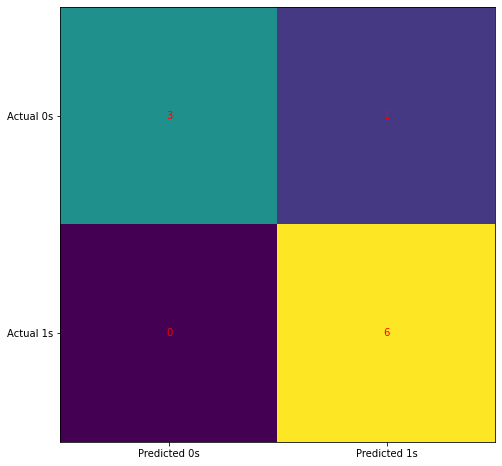

In [19]:

cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

Pada gambar ini, warna berbeda mwakili angka berbeda dan warna serupa mewakili angka serupa. Heatmaps adalah cara yang bagus u/ mempresentasikan matriks.

In [20]:

# Mendapatkan laporan yang lebih komprehensif ttg klasifikasi dengan classification_report():
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



## Improve model


KIta dapat meningkatkan model dengan mengatur parameter yang berbeda. Misalnya, mari bekerja dengan regularization strength C sama dengan 10,0 dari nilai default 1,0:

In [21]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [22]:
print(model.intercept_, model.coef_)

[-3.51335372] [[1.12066084]]


In [23]:
print(model.predict_proba(x))

[[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]


In [24]:
print(model.predict(x))

[0 0 0 0 1 1 1 1 1 1]


coefficient 𝑏₁ and the intercept 𝑏₀ lebih besar, karena nilai C yang lebih besar berarti regularisasi yang lebih lemah, atau penalti yang lebih lemah terkait dnegan nilai 𝑏₀ dan 𝑏₁ yang tinggi.

nilai 𝑏₀ dan 𝑏₁ yang berbeda menyiratkan perubahan logit f(x), nilai probabilitas p(x) yang berbeda, bentuk garis regresi yang berbeda dan kemungkinan perubahan dalam hasil prediksi dan kinerja klasifikasi lainnya.

nilai batas x yang mana p(x) =0,5 dan f(x)=0 sekarang berada diatas 3.

In [25]:
model.score(x,y)

1.0

In [26]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

In [27]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



# Contoh Kasus

## Klasifikasi Email Spam

In [36]:
import requests,zipfile,io

### Download Dataset
Dataset bisa download pada link berikut 'https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'

In [39]:
import pandas as pd
df = pd.read_csv('./Data/SMSSpamCollection.csv', sep='\t', header=None, names=['label', 'sms'])
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


karena file dataset yang kita gunakan berekstensi csv, maka disini kita menggunakan *pd.read_csv()* dan untuk parameternya:
- **sep** : untuk mendefinisikan separator, karena dataset SMS ini menggunakan separator tab maka disini kita isi dengan "\t"
- **header** : karena dataset ini tidak mengandung header maka kita set header=None
- **names** : untuk penaaman kolom, disini kita beri nama label dan sms

di tabel diatas terlihat bahwa dataframe kita memiliki dua kolom yaitu label dan sms, dimana kolom sms ini akan menampung sekumpulan teks sms yang akan kita jadikan nilai feature. Sedangkan nilai label berisi klasifikasi dari tiap teks smsnya, disini terdapat dua label ( ham, spam ). teks sms yang **tidak dikategorikan spam** mendapat label **ham** dan teks sms **yang dikategorikan spam** mendapat label **spam**.


In [40]:
df['label'].value_counts()


ham     4825
spam     747
Name: label, dtype: int64

perintah diatas digunakan untuk melihat berapa banyak data dari masing masing label, dan ditunjukan bahwa sms yang mendapat *label ham* sebanyak 4825 dan teks sms yang *berlabel spam* sebanyak 747.

Terdapat perbedaan yang sangat jauh antara data ham dan spam, kondisi seperti ini dikenal juga dengan istilah **Imbalance Dataset**. Untuk menangani kasus tersebut terdapat beberapa metode yang bisa kita gunakan salah satunya adalah metode **SMOTE**, namun pada kali ini kita tidak akan menangani kondisi tersebut

## Training & Testing Dataset

Sebelum Melakukan training, kita perlu split data terlebih dahulu menjadi data train dan data test.

Sebelum kita split data, kita akan mendefinisikan input dan juga labelnya, dengan cara berikut :

**Step 1:** import LabelBinarizer<br>
**Step 2:** Ambil semua nilai pada kolom "sms" dan simpan kedalam variable X, variabel ini akan menjadi data input kita<br>
**Step 3:** Ambil semua nilai dari kolom "label" dan simpan kedalam variable y, variable ini akan menjadi variabel yang berisi nilai label dari sms<br>
**Step 4:** Buat instance dari class LabelBinarizer<br>
**Step 5:** Lalu kita ubah nilai y dari "ham dan "spam" menjadi 0 dan 1 dengan menggunakan fungsi fit_transform, output dari LabelBinarizer akan menjadi multi dimensional array dan disini kita akan mengkonversikan kembali menjadi array satu dimensi dengan fungsi ravel() untuk mem-flatten dan hasil dari flatten tersbut yang kita tampung kedalam variabel y<br>

In [47]:
from sklearn.preprocessing import LabelBinarizer

X = df['sms'].values
y = df['label'].values

lb = LabelBinarizer()
y = lb.fit_transform(y).ravel()
lb.classes_

array(['ham', 'spam'], dtype='<U4')

Dari ouput diatas kelas "ham" akan dianggap 0 dan kelas "spam" akan dianggap 1

<br>
Setelah membuat data input dan juga labelnya, maka selanjutnya kita akan membagi data tersebut menjadi data train dan data test dengan cara berikut :

**Step 1:** import train_test_split dari package sklearn.model_selection<br>
**Step 2:** Lalu kita gunakan method train_test_split dengan parameter berikut :
- *X* : merupakan data input
- *y* merupakan label
- *test_size* : merupakan ukuran berapa kita akan membagi data tersebut menjadi data train dan test, disini kita mendefinisikan sebanyak 0.25 yang artinya data tersebut akan dibagi menjadi 75% data train dan 25% data test
- *random_state*: merupakan menentukan generator nomor acak pseudo-acak yang akan digunakan. <br>

Setelah itu simpan kedalam variabel X_train, X_test, y_train, y_test

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train, '\n')
print(y_train)

['Its going good...no problem..but still need little experience to understand american customer voice...'
 'U have a secret admirer. REVEAL who thinks U R So special. Call 09065174042. To opt out Reply REVEAL STOP. 1.50 per msg recd. Cust care 07821230901'
 'Ok...' ...
 "For ur chance to win a £250 cash every wk TXT: ACTION to 80608. T's&C's www.movietrivia.tv custcare 08712405022, 1x150p/wk"
 'R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO 2 MY HOUSE'
 'Mm feeling sleepy. today itself i shall get that dear'] 

[0 1 0 ... 1 0 0]


### Feature Extraction dengan TF-IDF

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [57]:
print(X_train_tfidf)

  (0, 6903)	0.3591386422223876
  (0, 2006)	0.2898082580285881
  (0, 900)	0.4114867709157148
  (0, 6739)	0.3546359942830148
  (0, 2554)	0.3825278811525034
  (0, 3926)	0.3126721340000456
  (0, 4453)	0.2297719954323795
  (0, 5123)	0.308974289326673
  (0, 3007)	0.21421364306658514
  (0, 2997)	0.23173982975834367
  (1, 36)	0.28902673040368515
  (1, 1548)	0.18167737976542422
  (1, 2003)	0.2711077935907125
  (1, 5301)	0.2711077935907125
  (1, 4358)	0.17341410292348694
  (1, 532)	0.20186022353306565
  (1, 6131)	0.16142609035094446
  (1, 5394)	0.16464655071448758
  (1, 4677)	0.24039776602646504
  (1, 216)	0.28902673040368515
  (1, 6013)	0.20089911182610476
  (1, 6472)	0.24039776602646504
  (1, 5441)	0.5009783758205715
  (1, 799)	0.25048918791028574
  (1, 5642)	0.24344998442301355
  :	:
  (4176, 343)	0.2811068572055718
  (4176, 107)	0.29968668460649284
  (4176, 2004)	0.25589560236817055
  (4176, 4350)	0.29968668460649284
  (4176, 637)	0.29968668460649284
  (4176, 7114)	0.4512018097459442
  (4176

### Binary Classification dengan Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [60]:
y_pred = model.predict(X_test_tfidf)

In [62]:
for pred, sms in zip(y_pred[:5], X_test[:5]):
    print(f'Pred: {pred} - SMS: {sms}')

Pred: 0 - SMS: Storming msg: Wen u lift d phne, u say "HELLO" Do u knw wt is d real meaning of HELLO?? . . . It's d name of a girl..! . . . Yes.. And u knw who is dat girl?? "Margaret Hello" She is d girlfrnd f Grahmbell who invnted telphone... . . . . Moral:One can 4get d name of a person, bt not his girlfrnd... G o o d n i g h t . . .@
Pred: 0 - SMS: <Forwarded from 448712404000>Please CALL 08712404000 immediately as there is an urgent message waiting for you.
Pred: 0 - SMS: And also I've sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed
Pred: 0 - SMS: Sir Goodmorning, Once free call me.
Pred: 0 - SMS: All will come alive.better correct any good looking figure there itself..


### Metriks Evaluasi pada Binary Classification
- Confusion matrix
- Accuracy
- Precission & Recall
- F1 Score
- ROC
<br>


**Confusion Matrix**
![title](img/conf_metrics.png)
- True Positive (TP): data yang diklasifikasikan dengan tepat sebagai keluaran positif dan benar
- False Negatif (FN) adalah data yang diklasifikasikan dengan kurang tepat
- False Positif (FP) adalah data yang diklasifikasikan kurang tepat apabila keluaran berupa positif atau benar
- True Negatif (TN) adalah data yang diklasifikasikan dengan tepat sebagaimana keluaran negatif atau salah.

Confusion Matrix seringkali juga dikenal sebgai error matirx

In [64]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
matrix

array([[1207,    1],
       [  48,  137]], dtype=int64)

In [66]:
tn, fp, fn, tp = matrix.ravel()

print(f'TN: {tn}')
print(f'FP: {fp}')
print(f'FN: {fn}')
print(f'TP: {tp}')

TN: 1207
FP: 1
FN: 48
TP: 137


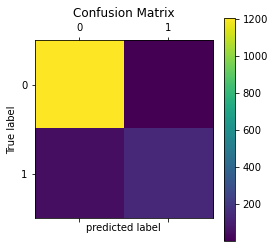

In [68]:
import matplotlib.pyplot as plt

plt.matshow(matrix)
plt.colorbar()

plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel("predicted label")
plt.show()

**Accuracy**
Penjelasan mengenai metric accuracy telah disinggung sebelumnya pada awal pembahan classification metric. Secara gampang, accuracy adalah seberapa akurat model mengklasifikasikan dengan benar. Secara matematis metric ini dapat diperoleh dengan rumus di bawah ini.
![title](img/accuracy.png)

In [69]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.964824120603015

**Precision**<br>
Precision adalah suatu metric yang menggambarkan akurasi data yang diminta dengan hasil prediksi yang diberikan oleh model. Secara matematis nilai precision dapat diperoleh dengan menggunakan cara di bawah ini.
![title](img/precision.png)

In [70]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.9927536231884058

**Recal or True Positive Rate(TPR) or Sensivity**<br>
Recall adalah suatu metric yang menggambarkan akurasi hasil prediksi dari model yang dibandingkan dengan keseluruhan jumlah ground truth dari data kelas tersebut. Nilai recall dapat diperoleh dengan cara di bawah ini.
![title](img/recal.png)

In [71]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.7405405405405405

**F1-Score**<br>
F-1 Score atau bisa disebut juga dengan F-1 Measurement adalah metrics yang menggambarkan perbandingan rata-rata precision dan recall yang harmonik. Metrics ini penting untuk mengetahui keharmonisan dari kedua metric tersebut. Hal ini karena jika nilai precision besar tetapi nilai recall kecil, prediksi dari model akurat tetapi tidak mencakup seluruh kemungkinan ground truth yang ada. Di lain sisi, apabila nilai recall tinggi tetapi tidak diikuti dengan nilai precision yang baik, prediksi dari model mencakup seluruh kemungkinan ground truth tetapi tidak diikuti dengan prediksi yang benar. Oleh karena itu, metric F-1 Score dapat menjadi faktor penentu keseimbangan antara kedua metric tersebut. Nilai F-1 Score dapat diperoleh dengan cara seperti di bawah ini.
![title](img/f1-score.png)

In [72]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.8482972136222909

**Receiver Operator Curve (ROC)**<br>
Kita telah membahas beberapa macam metrics yang biasa digunakan pada kasus klasifikasi. Terdapat beberapa kasus yang mana kita ingin menentukan batas atau threshold kondisi hasil prediksi suatu model dapat diklasifikasikan sebagai kelas positif. Perbedaan nilai threshold menyebabkan tiap nilai threshold memiliki nilai metricnya sendiri. Oleh karena itu, kita harus mempertimbangkan performa pada nilai threshold yang berbeda. Metode yang dapat kita gunakan untuk melihat performa pada nilai threshold yang berbeda adalah AUC ROC Curve.
![title](img/roc.jpg)
ROC memiliki kepanjangan Receiver Operator Curve (ROC) dan AUC adalah Area Under Curve (AUC). Dengan ROC kita dapat melakukan visualisasi grafik True Positif Rate (Recall) vs False Positive Rate (FPR/Fallout) dengan nilai threshold yang bervariasi. Secara umum apabila nilai prediksi kita lebih dari 0.5 akan diklasifikasikan sebagai kelas positif. Tetapi terkadang kita ingin hanya nilai prediksi diatas 0.7 yang dikategorikan sebagai positif. Dengan ROC kita dapat melihat seluruh kemungkinan dari beberapa nilai threshold dan dapat memilih nilai threshold yang menghasilkan hasil paling baik.
![title](img/roc_formula.png)


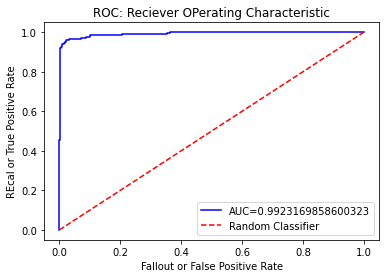

In [73]:
from sklearn.metrics import roc_curve, auc
prob_estimates = model.predict_proba(X_test_tfidf)

fpr, tpr, threshold = roc_curve(y_test, prob_estimates[:,1])
nilai_auc = auc(fpr,tpr)

plt.plot(fpr, tpr, 'b', label=f'AUC={nilai_auc}')
plt.plot([0,1], [0,1], 'r--', label='Random Classifier')

plt.title('ROC: Reciever OPerating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('REcal or True Positive Rate')
plt.legend()
plt.show()